# machine learning课程线性回归代码练习

## 公式总结
    用LaTeX编辑器编辑的公式，等4月开学前抽时间学习LaTeX
### 1. Linear regression
#### Hypothesis function
$$h_{\theta} = \theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... +  \theta_{n}x_{n}$$
#### Cost function
$$ J(\theta ) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})-y^{(i)} ) ^{2} $$
#### Gradient descent
$$ \theta_{j} = \theta_{j} - \frac{\partial J(\theta )}{\partial \theta_{j}} = \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}\left [(h_{\theta} (x^{(i)})-y^{(i)} ) x_{j}^{(i)}  \right ] $$

### 2. Normal equation
$$ \theta = (X^{T}X)^{-1}*(X^{T}y) $$

## Linear regression with single variable
    The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.
    
## 失误总结:
    在写算法代码时候一定要注意精度损失！如果无法收敛的话很可能是数据类型错误！
    e.g. theta = np.array([0]*x.shape[1]) ----------> theta = np.array([0]*x.shape[1],dtype=float)
         #这个代码错在将theta参数设置为int类型，后面会导致无法收敛

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据预处理
def data_preprocession(data):
    
    # 将点的信息存储在x,y中
    x = data[:, :data.shape[1]-1].reshape([data.shape[0], data.shape[1]-1])
    y = data[:, data.shape[1]-1]
    
    # 在x数组中插入一列1的数组，提供偏置
    x = np.insert(x, 0, np.array([1]), 1)
    
    # 初始化theta，一定记得设置为浮点类型，否则无法收敛
    theta = np.array([0]*x.shape[1], dtype="f8")
    
    return x, y, theta

In [3]:
# 将文件中数据以数组形式导入python
# 数组data第一列为所有点的x坐标，第二列为所有点的y坐标
data = np.loadtxt("ex1data1.txt",delimiter=",")

# 从所有点的数据中提取出点的自变量，因变量信息
# 初始化参数theta
x, y, theta = data_preprocession(data)

### 绘制散点图查看点的分布情况

min(x):5.026900, max(x):22.203000
min(y):-2.680700, max(y):24.147000


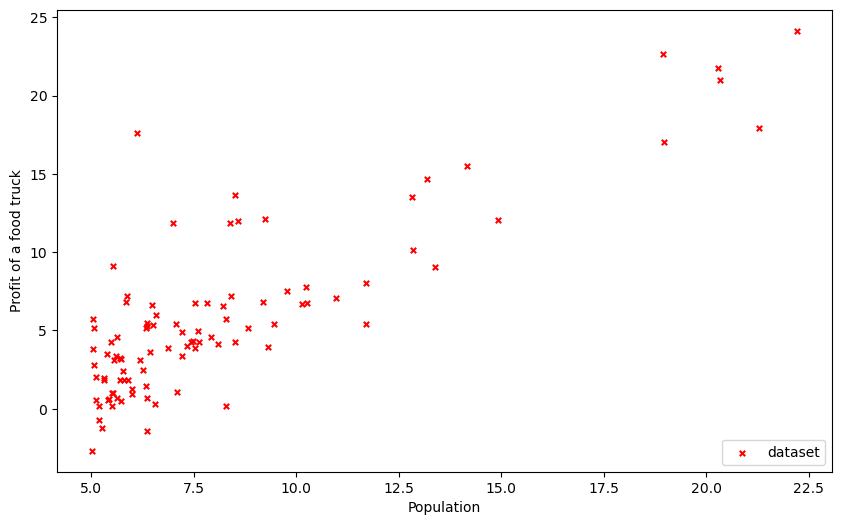

In [4]:
plotx = x[:,1]

#查看数据的范围,根据具体范围来设定坐标轴的合适显示范围
print("min(x):%f, max(x):%f\nmin(y):%f, max(y):%f"%(np.amin(plotx),np.amax(plotx),np.amin(y),np.amax(y)))

fig, ax = plt.subplots(1,1, figsize=(10,6))
#绘制散点图
ax.scatter(plotx, y, marker="x", s=15, color="r", label="dataset")

#设置坐标轴名称
ax.set_xlabel("Population")
ax.set_ylabel("Profit of a food truck")

ax.legend(loc="lower right")

In [5]:
# 计算损失函数的值
def cost_func(x, y, theta):
    # cost function
    cost = (1/(2*len(y)))*np.sum((np.dot(x, theta) - y)**2)
    return cost

# 进行梯度下降
def gradient_descent(x, y, theta, alpha):

    # 一定记得设置为浮点类型，否则无法收敛
    theta_new = np.array([0]*x.shape[1],dtype="f8")
    loss = np.dot(x, theta) - y

    # gradient descent, 同时赋值theta(j)
    for j in range(x.shape[1]):
        theta_new[j] = theta[j]-(alpha/len(y))*np.sum(loss * x[:, j])
        
    return cost_func(x, y, theta_new), theta_new

In [6]:
#设置times(迭代次数)，alpha(学习率)
alpha = 0.01
times = 1000

In [7]:
regcost = [] # 用regcost来保存cost数值变化过程

# 循环times次，计算cost和theta
for _ in range(times):
    cost, theta = gradient_descent(x, y, theta, alpha)
    regcost.append(cost)

print("Function after training is: {:.2f} + {:.2f}*x \nCost is {:.2f}".format(theta[0],theta[1], cost))

Function after training is: -3.24 + 1.13*x 
Cost is 4.52


### 训练完之后查看训练好的函数图形

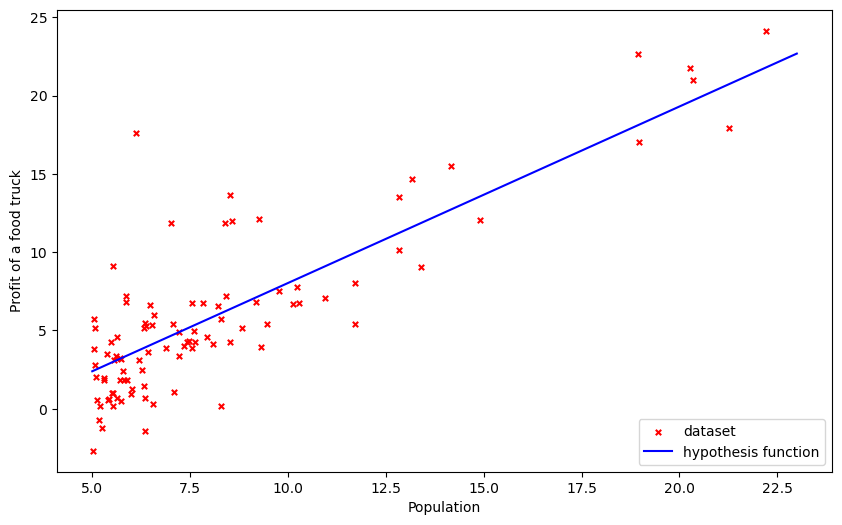

In [8]:
# 设置函数的取样点
x_sample = np.linspace(5,23,200)
x_sample = np.stack([np.array([1]*len(x_sample)), x_sample], axis=1)
y_sample = np.dot(x_sample,theta)

fig, ax = plt.subplots(1,1, figsize=(10,6))
# 绘制函数和散点图
ax.scatter(plotx, y, marker="x", s=15, color="r", label="dataset")
ax.plot(x_sample[:,1], y_sample, "b-", label="hypothesis function")

# 设置坐标轴名称
ax.set_xlabel("Population")
ax.set_ylabel("Profit of a food truck")

ax.legend(loc="lower right")

### 查看训练过程中损失函数值的变化过程

(4.0, 7.0)

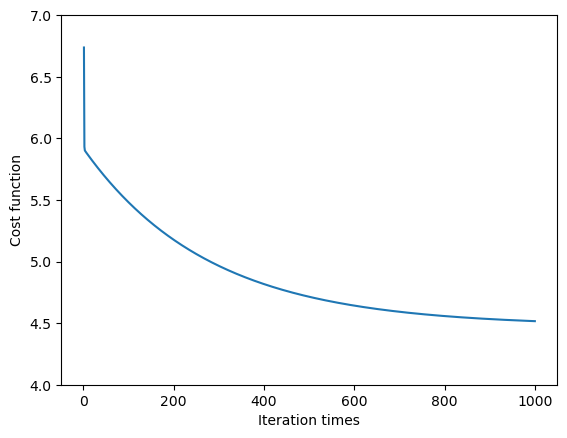

In [9]:
plt.plot(np.arange(1,times+1), regcost, label="cost function")

# 设置坐标轴名称
plt.xlabel("Iteration times")
plt.ylabel("Cost function")

# 设置坐标轴刻度范围，和函数显示范围
# 函数只截取部分显示，这样变化过程更加清楚
plt.yticks(np.arange(4, 8, 0.5))
plt.ylim(4, 7)

### 查看cost function随theta变化的3D绘图
    最后有一题是绘制3D的损失函数随着参数变化的图像，matplotlib学习pyplot库和面向对象编程花了一周时间从早到晚学习，实在耗费了很大精力。暂时没有多的精力补充这部分内容，等后面4月开学前找时间学习3D绘图的库补上这部分内容，先继续学习机器学习理论和开始pytorch学习    2023/1/6

    一开始不太懂，跟着网络上教程直接从简易的pyplot库开始学习，学到差不多发现matplotlib库使用编程方式能更好掌握其中原理并理解。只是使用pyplot的话对其中很多参数掌握似是而非，不能很好的画图。遂重新从开头学习如何正确使用库的方式。

In [10]:
def threedimplot():
    pass

## Linear regression with multiple variable
    The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
    
    
## 失误总结
    Question: 为什么同样的梯度下降方法，在前一个dataset中能够正常工作，而多变量下则无法收敛甚至开始震荡？
    (这个问题困扰了我一晚上才解决)
    
    Answer: DATASET!在写代码之前要注意观察dataset的性质！
    第二个dataset中明显价格变量和自变量的房屋大小的数值要远大于第二个参数房间数目，所以在训练之前一定要进行特征缩放来预处理训练数据
    要保证输入的参数范围在 [-3,-1/3] | [1/3,3] 之间较为合适

In [11]:
# 特征缩放
def feature_scaling(x, y):
    for i in range(1, x.shape[1]):
        x[:,i] = (x[:,i]-np.mean(x[:,i])) / np.std(x[:,i])
        
    y = (y - np.mean(y)) / np.std(y)
    return x, y

In [12]:
# 将文件内的数据导入python
house_data = np.loadtxt("ex1data2.txt", delimiter=",", dtype=float)

# 从所有点的数据中提取出点的自变量，因变量信息
# 初始化参数theta
x, y, theta = data_preprocession(house_data)

# 因为dataset中部分数据范围过大，进行特征缩放
x, y = feature_scaling(x, y)

In [13]:
#设置times(迭代次数)，alpha(学习率)，设置不同的学习率查看效果
times = 1000
alpha = np.array([10, 1, 0.1, 0.01], dtype="f8")

# 定义一个0数组来接受迭代过程中返回的cost方便后面绘图使用
regcost = np.zeros([times, len(alpha)], dtype="f8")

# 进行times次迭代
for i in range(len(alpha)):
    for count in range(times):
        cost, theta = gradient_descent(x, y, theta, alpha[i])
        regcost[count, i] = cost
    
    # 打印出训练结果
    print("alpha = %d :"%alpha[i])
    print("\tFunction after training is: {:.2f} + {:.2f}*x1 + {:.2f}*x2 \n\tCost is {:.2f}\n"\
          .format(theta[0], theta[1], theta[2], cost))
    
    # 将theta置0重新开始下一个alpha新的值的学习
    theta = np.array([0]*x.shape[1], dtype="f8")
    
print("#nan时代表训练模型失败，参数不收敛，下方有报错信息")

alpha = 10 :
	Function after training is: nan + nan*x1 + nan*x2 
	Cost is nan

alpha = 1 :
	Function after training is: -0.00 + 0.88*x1 + -0.05*x2 
	Cost is 0.13

alpha = 0 :
	Function after training is: -0.00 + 0.88*x1 + -0.05*x2 
	Cost is 0.13

alpha = 0 :
	Function after training is: -0.00 + 0.88*x1 + -0.05*x2 
	Cost is 0.13

#nan时代表训练模型失败，参数不收敛，下方有报错信息


/home/ly/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_98892/2419402587.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/(2*len(y)))*np.sum((np.dot(x, theta) - y)**2)
/home/ly/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [14]:
# 查看cost function 数据变化
np.amax(regcost, axis=0), np.amin(regcost, axis=0)

(array([       nan, 0.24843981, 0.41409052, 0.49080152]),
 array([       nan, 0.13352749, 0.13352749, 0.13354179]))

### 绘制cost随着迭代过程的下降图像
    可以看到基本在200次迭代以内就已经收敛，0.1以上的学习率在100次以内都能够收敛

alpha=10 的函数曲线图像因为发散所以无法显示在图像中


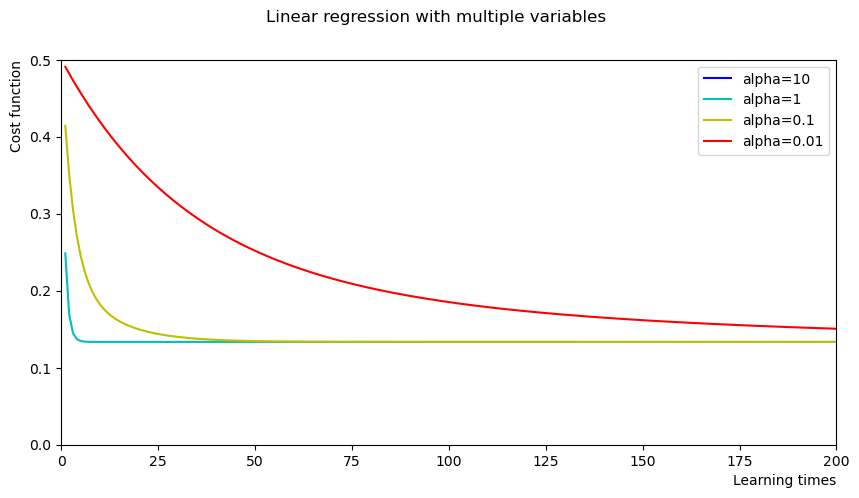

In [15]:
xaxis = np.arange(1, times+1)

# 创建画布
fig, ax = plt.subplots(figsize=(10,5))
                       
# 绘制图像
ax.plot(xaxis, regcost[:,0], "b-", label="alpha=10")
ax.plot(xaxis, regcost[:,1], "c-", label="alpha=1")
ax.plot(xaxis, regcost[:,2], "y-", label="alpha=0.1")
ax.plot(xaxis, regcost[:,3], "r-", label="alpha=0.01")

# 标题
fig.suptitle("Linear regression with multiple variables")

# 调整坐标轴
ax.set_ylabel("Cost function", loc="top")
ax.set_xlabel("Learning times", loc="right")
ax.set_ylim(0, 0.5)
ax.set_xlim(0,200)

# 显示函数图像label
ax.legend()

print("alpha=10 的函数曲线图像因为发散所以无法显示在图像中")

## 正规方程
    单变量的是1，多变量的是2
    此方法不用进行特征缩放，theta结果比较大

In [16]:
# 将文件内的数据导入python
data = np.loadtxt("ex1data1.txt", delimiter=",", dtype=float)
house_data = np.loadtxt("ex1data2.txt", delimiter=",", dtype=float)

# 从所有点的数据中提取出点的自变量，因变量信息
# 初始化参数theta
x1, y1, theta1 = data_preprocession(data)
x2, y2, theta2 = data_preprocession(house_data)

In [17]:
def normal_equation(x, y):
    mat1 = np.linalg.inv(np.dot(x.T, x)) 
    mat2 = np.dot(x.T, y.T)
    theta = np.dot(mat1, mat2)
    
    return theta

In [18]:
theta1 = normal_equation(x1, y1)
theta2 = normal_equation(x2, y2)
print("theta single var:\t", theta1)
print("theta multiple vars:\t", theta2)

theta single var:	 [-3.89578088  1.19303364]
theta multiple vars:	 [89597.9095428    139.21067402 -8738.01911233]


In [19]:

cost1 = cost_func(x1, y1, theta1)
cost2 = cost_func(x2, y2, theta2)

print(cost1, cost2)

4.476971375975179 2043280050.6028285


In [20]:
print("single:")
print("\tFunction after training is: {:.2f} + {:.2f}*x \nCost is {:.2f}".format(theta1[0],theta1[1], cost1))
print("multiple:")
print("\tFunction after training is: {:.2f} + {:.2f}*x1 + {:.2f}*x2 \n\tCost is {:.2f}\n"\
          .format(theta2[0], theta2[1], theta2[2], cost2))

single:
	Function after training is: -3.90 + 1.19*x 
Cost is 4.48
multiple:
	Function after training is: 89597.91 + 139.21*x1 + -8738.02*x2 
	Cost is 2043280050.60

